<a href="https://colab.research.google.com/github/Renan-LS/Renan-LS/blob/main/cred_score.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [13]:
# Descrição das Features:
# ● idade: A idade do cliente

# ● numero_de_dependentes: O número de pessoas dependentes do cliente.

# ● salario_mensal: Salário mensal do cliente.

# ● numero_emprestimos_imobiliarios: Quantidade de empréstimos imobiliários que o cliente possui em aberto.

# ● util_linhas_inseguras: Quanto que o cliente está usando, relativamente ao limite dele, 
#de linhas de crédito que não são seguradas por qualquer bem do tomador e.g: imoveis, carros etc.

# ● vezes_passou_de_30_59_dias: Número de vezes que o cliente atrasou, entre 30 e 59 dias, o pagamento de um empréstimo.
# ● numero_de_vezes_que_passou_60_89_dias: Número de vezes que o cliente atrasou, entre 60 e 89 dias, o pagamento de um empréstimo
# ● numero_vezes_passou_90_dias: Número de vezes que o tomador passou mais de 90 dias em atraso.

# ● razao_debito: Razão entre as dívidas e o patrimônio do tomador. razão débito = Dividas/Patrimônio

# ● numero_linhas_crdto_aberto: Número de empréstimos em aberto pelo cliente.


# ● Saída: 1 - Inadimplente / 0 - Adimplente

In [ ]:
!pip install plotly --upgrade

In [64]:
pd.options.display.float_format = '{:,.2f}'.format

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

In [6]:
cred_score = pd.read_csv('/content/treino.csv')

In [43]:
cred_score.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110000 entries, 0 to 109999
Data columns (total 11 columns):
 #   Column                                 Non-Null Count   Dtype  
---  ------                                 --------------   -----  
 0   inadimplente                           110000 non-null  float64
 1   util_linhas_inseguras                  110000 non-null  float64
 2   idade                                  110000 non-null  float64
 3   vezes_passou_de_30_59_dias             110000 non-null  float64
 4   razao_debito                           110000 non-null  float64
 5   salario_mensal                         88247 non-null   float64
 6   numero_linhas_crdto_aberto             110000 non-null  float64
 7   numero_vezes_passou_90_dias            110000 non-null  float64
 8   numero_emprestimos_imobiliarios        110000 non-null  float64
 9   numero_de_vezes_que_passou_60_89_dias  110000 non-null  float64
 10  numero_de_dependentes                  107124 non-null  

In [65]:
cred_score.describe()
# variável inadimplente(qualitativa nominal) esta assumindo valores diferentes de 1 e 0
# 

inadimplente  util_linhas_inseguras      idade  \
count    110,000.00             110,000.00 110,000.00   
mean           0.11                   5.97      52.26   
std            1.49                 252.31      14.76   
min            0.00                   0.00      21.00   
25%            0.00                   0.03      41.00   
50%            0.00                   0.16      52.00   
75%            0.00                   0.56      63.00   
max           52.26              50,708.00     109.00   

       vezes_passou_de_30_59_dias  razao_debito  salario_mensal  \
count                  110,000.00    110,000.00       88,247.00   
mean                         0.47        354.49        6,631.97   
std                          4.48      2,073.51       13,384.30   
min                          0.00          0.00            0.00   
25%                          0.00          0.18        3,400.00   
50%                          0.00          0.37        5,400.00   
75%                          0.00          0.87        8,219.00   
max                         98.00    329,664.00    3,008,750.00   

       numero_linhas_crdto_aberto  numero_vezes_passou_90_dias  \
count                  110,000.00                   110,000.00   
mean                         8.48                         0.31   
std                          5.28                         4.46   
min                          0.00                         0.00   
25%                          5.00                         0.00   
50%                          8.00                         0.00   
75%                         11.00                         0.00   
max                         58.00                        98.00   

       numero_emprestimos_imobiliarios  numero_de_vezes_que_passou_60_89_dias  \
count                       110,000.00                             110,000.00   
mean                              1.06                                   0.29   
std                               1.83                                   4.45   
min                               0.00                                   0.00   
25%                               0.00                                   0.00   
50%                               1.00                                   0.00   
75%                               2.00                                   0.00   
max                              54.00                                  98.00   

       numero_de_dependentes  
count             107,124.00  
mean                    0.80  
std                     1.84  
min                     0.00  
25%                     0.00  
50%                     0.00  
75%                     1.00  
max                    52.26

In [ ]:
cred_score.isnull().sum() #verificado que nao existem valores nulos gerando anomalias

In [58]:
np.unique(cred_score['inadimplente'],return_counts=True) #Verificando a quantidade  de registro que existe em cada uma das classes
 

(array([ 0.        ,  1.        , 52.25801316]),
 array([102588,   7325,     87]))

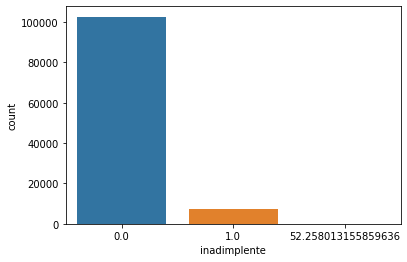

In [59]:
sns.countplot(x = cred_score['inadimplente']);

In [25]:
graf = px.scatter_matrix(cred_score,dimensions=['idade','salario_mensal','razao_debito'],color='inadimplente')
graf.show()

In [68]:
cred_score.loc[cred_score['idade'] <= 0]
#cred_score[cred_score['idade'] <= 0]
#verificando as idades que são zeradas ou negativas
#     TÉCNICAS PARA TRATAMENTO DE IDADE ZERADA:
# -Apagar a coluna inteira ( se a anomalia for em grande parte dos registros da tabela)
# -Apagar somente os registros com valores inconsistentes
# -Preencher os valores incosistentes manualmente
# -Preencher os valores faltantes com a media das idades, retirando as inconsistencias antes

Empty DataFrame
Columns: [inadimplente, util_linhas_inseguras, idade, vezes_passou_de_30_59_dias, razao_debito, salario_mensal, numero_linhas_crdto_aberto, numero_vezes_passou_90_dias, numero_emprestimos_imobiliarios, numero_de_vezes_que_passou_60_89_dias, numero_de_dependentes]
Index: []

In [33]:
cred_score['idade'][cred_score['idade'] > 0].mean() #media de idade, desconsiderando os valores nulos na coluna idade

52.258013155859636

In [36]:
cred_score1 = cred_score
cred_score1.loc[cred_score1['idade'] <= 0 ] = 52.258013155859636

In [42]:
graf = px.scatter_matrix(cred_score1,dimensions=['idade','salario_mensal','razao_debito'],color='inadimplente')
graf.show()

In [69]:
graf2 = px.scatter_matrix(cred_score,dimensions=['inadimplente'])
graf2.show()
#cred_score.loc[cred_score['inadimplente']  ]
#np.unique(cred_score['inadimplente'],return_counts=True) 
graf3 = px.scatter_matrix(cred_score,dimensions=['util_linhas_inseguras'])
graf3.show() 
graf4 = px.scatter_matrix(cred_score,dimensions=['razao_debito'])
graf4.show()


inadimplente                                 0
util_linhas_inseguras                        0
idade                                        0
vezes_passou_de_30_59_dias                   0
razao_debito                                 0
salario_mensal                           21753
numero_linhas_crdto_aberto                   0
numero_vezes_passou_90_dias                  0
numero_emprestimos_imobiliarios              0
numero_de_vezes_que_passou_60_89_dias        0
numero_de_dependentes                     2876
dtype: int64